In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Style of Plots
plt.style.use('fivethirtyeight')

# Read files
df = pd.read_csv("Plane Crash dataset.csv")

In [4]:

print("all fatalities", df["Total fatalities"].sum())

category = 'Crash cause'
numeric = 'Total fatalities'

# group fatalities by cause:  https://datagy.io/pandas-groupby/
gb = df.groupby(category)[numeric].sum()
print("groupby as Series:") 
print(gb, type(gb))

# The issue (for me anyway) is that gb is not a dataframe, the left most "column"
# is its index (which can be non-numeric) and the right (unnamed) column has
# the actual values. Thing is you can't plot with that (x=index y=unnamed) so
# I'll create a new, separate df for plotting:

d = {category: gb.index,
      numeric: gb.values}
dfgb = pd.DataFrame(d)
dfgb

all fatalities 158735
groupby as Series
Crash cause
Human factor                          72955
Other causes                           4002
Technical failure                     29599
Terrorism act, Hijacking, Sabotage    12712
Unknown                               28614
Weather                               10853
Name: Total fatalities, dtype: int64 <class 'pandas.core.series.Series'>


,Crash cause,Total fatalities
0,Human factor,72955
1,Other causes,4002
2,Technical failure,29599
3,"Terrorism act, Hijacking, Sabotage",12712
4,Unknown,28614
5,Weather,10853


In [5]:
# sorting
dfgb.sort_values(by=[numeric], ascending=False, inplace=True)
dfgb

,Crash cause,Total fatalities
0,Human factor,72955
2,Technical failure,29599
4,Unknown,28614
3,"Terrorism act, Hijacking, Sabotage",12712
5,Weather,10853
1,Other causes,4002


In [6]:
import textwrap
# https://medium.com/dunder-data/automatically-wrap-graph-labels-in-matplotlib-and-seaborn-a48740bc9ce
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

Text(0.5, 1.0, 'Deaths by Cause')

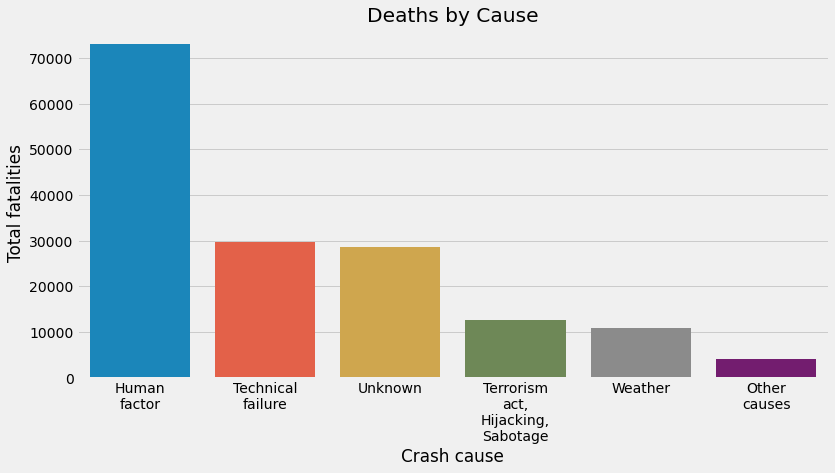

In [7]:
import seaborn as sns

plt.style.use('fivethirtyeight') # works but you should also check out the seaborn themes
fig, ax = plt.subplots(figsize=(12, 6)) 
ax = sns.barplot(x=category, y=numeric, # which columns for x and y
                    data=dfgb, # in which dataframe
                    ci=0, # no error bars (much faster!)
                    ) 

# wrap x labels
wrap_labels(ax, 10)
ax.set_title('Deaths by Cause')